In [1]:
import numpy as np
from numpy import linalg as LA

import matplotlib.pyplot as plt
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

from scipy.linalg import expm

from qiskit import IBMQ,BasicAer,Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit,ClassicalRegister,QuantumRegister,execute

from qiskit.tools.visualization import plot_histogram

In [ ]:
# The classic part is buit after the turhttps://www.youtube.com/watch?v=lTSLypQqSd0

In [2]:
#constants
hbar=6.58e-16 # [eV*s] reduce Plank constant
c_cm=2.997e10 # [cm/s] speed of light 
c_nm=2.997e17 # [nm/s] speed of light 
amu2eV=931.5e6 # [eV] convert amu to eV; E=m*c^2

#prameters 

N = 16 #nr of basis state in a truncate representation 

m_amu = 6 # [amu] oscilator mass
m=m_amu*amu2eV/(c_nm*c_nm) # [eV*s^2/nm^2] oscilator mass

f_inv_cm = 300 # [cm^{-1}] wave number
f=f_inv_cm*c_cm # [Hz] freqency
w=2*np.pi*f #[rad/s] freqency

nt = 100 #nr of time points 
TimeSpan = 4 # [To] timespan in uits of To

In [14]:
# Write initial stte in energy basis 
#################################################################################
psi=np.zeros(N,dtype=complex)
psi[0]=psi[1]+1/np.sqrt(2)
psi[3]=psi[2]+1/np.sqrt(2)
#################################################################################

#Ladder operators 
#a-
a=np.diag(np.ones(N-1),1)
for i in range(N-1):
    a[i][i+1]=a[i][i+1]*np.sqrt(i+1)
#a+
ad=np.diag(np.ones(N-1),-1)
for i in range(N-1):
    ad[i+1][i]=ad[i+1][i]*np.sqrt(i+1)
    
    
#I
I=np.diag(np.ones(N),0)

#Hamiltonian operor
H=hbar*w*(np.matmul(ad,a)+0.5*I)

#Position operator
X=np.sqrt(hbar/(2*m*w))*(ad+a)

#Momentum operator 
P=complex(0,1)*np.sqrt(hbar/(2*m*w)*(ad-a))

#Transformation from energy basis to pozition basis 
#UEX-eigenvectors of X ,X eiganvale of X in 
Xeigval,UEX=LA.eig(X)
UXE=UEX.conj().T

# for stationary part 
n=2 # index of eiganstate
eigenstate_n_E=np.zeros(N,dtype=complex)
eigenstate_n_E[n]=1
pd_eigenstate_n_E= np.conjugate(eigenstate_n_E)*eigenstate_n_E #probability distribution

#
eigenstate_n_X=np.matmul(UXE,eigenstate_n_E)
pd_eigenstate_n_X= np.conjugate(eigenstate_n_X)*eigenstate_n_X #probability distribution  on X

#Time part
Eo=hbar*w*0.5 #ground state energy
To=hbar/Eo # [s] time sscale for the problrm 

t=np.linspace(0,TimeSpan*To,nt)# time vector 

#time evolution
psi_t_E=np.zeros((nt,N),dtype=complex) # time variing state psi(t) [energy basis]
psi_t_X=np.zeros((nt,N),dtype=complex) # time variing state psi(t) [coordonate  basis]
pd_t_E=np.zeros((nt,N),dtype=complex) # time variing probability dystribution of Energy E
pd_t_X=np.zeros((nt,N),dtype=complex) # time variing probability distibution coordonate X
#time propagation
for t_idx in range(0,nt):
    Ut=expm(-complex(0,1)*H*t[t_idx]/hbar) # Tim evolution Operator 
    psi_t_E[t_idx]=np.dot(Ut,psi)# !! possible discard imaginary error 
    psi_t_X[t_idx]=np.dot(UXE,psi_t_E[t_idx])
    pd_t_E[t_idx]=np.conjugate(psi_t_E[t_idx])*psi_t_E[t_idx]
    pd_t_X[t_idx]=np.conjugate(psi_t_X[t_idx])*psi_t_X[t_idx]
    
    
#Helpful vizualization
#############################################################################################
#Verificari 
#print("a- = \n",a)
#print("a+ = \n",ad)
#print("I = \n",I)
#print("H = \n",H)
#print("X = \n",X)
#print("P = \n",P)
#print("eigenstate_n_E = \n",eigenstate_n_E)
#print("pd_eigenstate_n_E = \n",pd_eigenstate_n_E)
#print("pd_eigenstate_n_X = \n",pd_eigenstate_n_X)
#print("UEX = \n",UEX)
#print("Xeigval = \n",Xeigval)
#print("UXE = \n",UXE)
#print("eigenstate_n_X = \n",eigenstate_n_X)
#print("Ut = \n",Ut)

C:\Users\tomut\Anaconda3\envs\venvQ\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in sqrt


In [12]:
%matplotlib qt # 3d graph in a new window , more versatile

UsageError: unrecognized arguments: # 3d graph in a new window , more versatile


C:\Users\tomut\Anaconda3\envs\venvQ\lib\site-packages\ipykernel_launcher.py:28: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\tomut\Anaconda3\envs\venvQ\lib\site-packages\ipykernel_launcher.py:31: ComplexWarning: Casting complex values to real discards the imaginary part


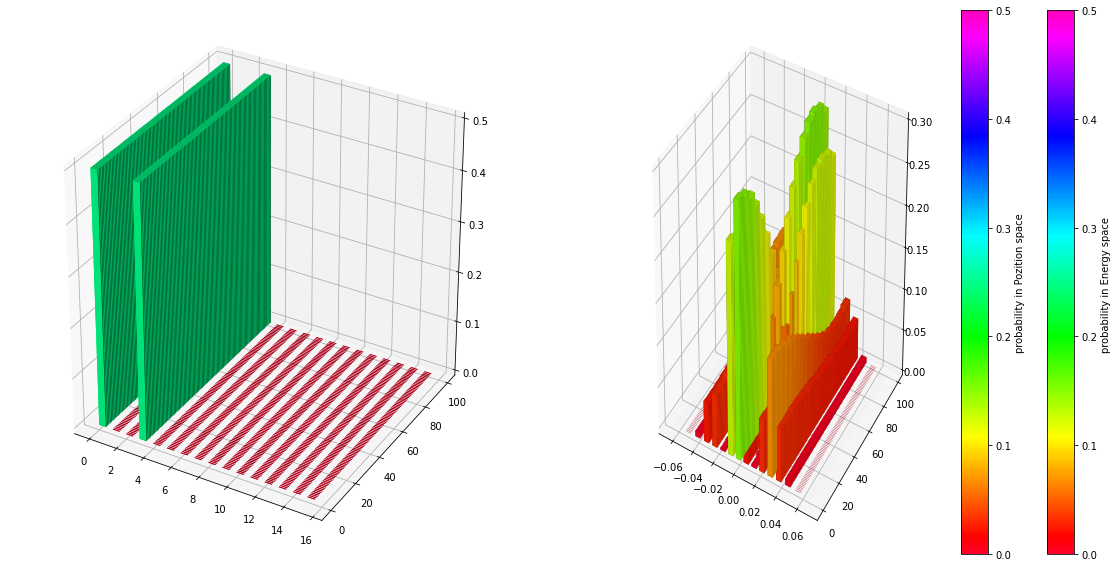

In [31]:
#Vizualization

fig =  plt.figure(figsize=(20, 10))

#Energy vizualization
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

xpos2 = np.zeros(N*nt)
for i in range(N*nt):
    xpos2[i]=Xeigval[i%N]
xpos = np.zeros(N*nt)
for i in range(N*nt):
    xpos[i]=i%N
ypos = np.zeros(N*nt)
for i in range(N*nt):
    ypos[i]=int(i/N)
    
num_elements = len(xpos)
zpos = np.zeros(N*nt)
dx = np.ones(N*nt)*0.5
dy = np.ones(N*nt)*0.5
dz = np.zeros(N*nt)*0.5
dx2 = np.ones(N*nt)*0.005
dy2 = np.ones(N*nt)*0.005

for i in range(N*nt):
    dz[i]=pd_t_E[int(i/nt)][i%N]
dz2 = np.zeros(N*nt)
for i in range(N*nt):
    dz2[i]=pd_t_X[int(i/nt)][i%N]
    
colours1 = plt.cm.gist_rainbow(dz)
colourMap1 = plt.cm.ScalarMappable(cmap=plt.cm.gist_rainbow)
colourMap1.set_array(dz)
colBar1 = plt.colorbar(colourMap1).set_label('probability in Energy space ')

colours2 = plt.cm.gist_rainbow(dz2)
colourMap2 = plt.cm.ScalarMappable(cmap=plt.cm.gist_rainbow)
colourMap2.set_array(dz)
colBar2 = plt.colorbar(colourMap1).set_label('probability in Pozition space')

ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color=colours1,shade=True)
ax2.bar3d(xpos2, ypos, zpos, dx2, dy2, dz2, color=colours2,shade=True)

#
plt.show()

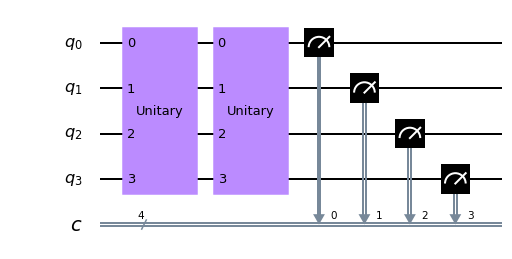

In [6]:
# Fast implementation on a QC 
# fortunatly we can use qiskit .unitary to decompoze our operator in switabel gates these is not a trivial task 
#We will speack more about these at the end 

nq=int(np.log2(N))#nr of qbits need

q=QuantumRegister(nq,'q')
c=ClassicalRegister(nq,'c')

qc=QuantumCircuit(q,c)


#qc.x(q[0])

qc.unitary(Ut,q)
qc.unitary(UXE,q)
qc.measure(range(nq),range(nq))

qc.draw(output='mpl')

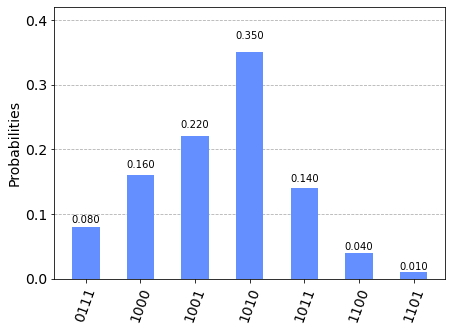

In [7]:
backend=Aer.get_backend('qasm_simulator')
shots=100
result= execute(qc,backend=backend,shots=shots).result()
counts=result.get_counts(qc)
plot_histogram(counts, sort='asc')

In [8]:
#constants 
##########################################################################################
hbar=6.58e-16 # [eV*s] reduce Plank constant
c_cm=2.997e10 # [cm/s] speed of light 
c_nm=2.997e17 # [nm/s] speed of light 
amu2eV=931.5e6 # [eV] convert amu to eV; E=m*c^2
###########################################################################################

#prameters 
###########################################################################################
N = 16 #nr of basis state in a truncate representation 

m_amu = 6 # [amu] oscilator mass
m=m_amu*amu2eV/(c_nm*c_nm) # [eV*s^2/nm^2] oscilator mass

f_inv_cm = 300 # [cm^{-1}] wave number
f=f_inv_cm*c_cm # [Hz] freqency
w=2*np.pi*f #[rad/s] freqency

nt = 100 #nr of time points 
TimeSpan = 4 # [To] timespan in uits of To
psi=np.zeros(N)
psi[0]=1
############################################################################################

#Qantum cuecuit build and run 
def QHOs(N,psi,Ut,UXE):
    
    nq=int(np.log2(N))#nr of qbits need
    q=QuantumRegister(nq,'q')
    c=ClassicalRegister(nq,'c')

    qc=QuantumCircuit(q,c)

    qc.initialize(psi,q)
    qc.unitary(Ut,q)
    qc.unitary(UXE,q)#change from energy basi to pozition basis 
    qc.measure(range(nq),range(nq))
    
    #exract probability distribution
    backend=Aer.get_backend('qasm_simulator')
    shots=100
    result= execute(qc,backend=backend,shots=shots).result()
    counts=result.get_counts(qc)
    
    return counts

def QantumOscilator(N,psi,nt,m_amu,f_inv_cm,TimeSpan):
    
    #N-Nr of basis state 
    #psi-statevector 
    #nt-nr of time points 
    #m_amu- [amu] oscilator mass
    #f_inv_cm-[cm^{-1}] wave number
    #TimeSpan-[To] timespan in uits of To
    
    #some conversion 
    m=m_amu*amu2eV/(c_nm*c_nm) # [eV*s^2/nm^2] oscilator mass
    f=f_inv_cm*c_cm # [Hz] freqency
    w=2*np.pi*f #[rad/s] freqency
    
    #Ladder operators 
    #a-
    a=np.diag(np.ones(N-1),1)
    for i in range(N-1):
        a[i][i+1]=a[i][i+1]*np.sqrt(i+1)
    #a+
    ad=np.diag(np.ones(N-1),-1)
    for i in range(N-1):
        ad[i+1][i]=ad[i+1][i]*np.sqrt(i+1)

    #I
    I=np.diag(np.ones(N),0)

    #Hamiltonian operor
    H=hbar*w*(np.matmul(ad,a)+0.5*I)

    #Position operator
    X=np.sqrt(hbar/(2*m*w))*(ad+a)

    #Momentum operator 
    P=complex(0,1)*np.sqrt(hbar/(2*m*w)*(ad-a))

    #Transformation from energy basis to pozition basis 
    #UEX-eigenvectors of X ,X eiganvale of X in 
    Xeigval,UEX=LA.eig(X)
    UXE=UEX.conj().T
    
    Eo=hbar*w*0.5 #ground state energy
    To=hbar/Eo # [s] time sscale for the problrm 

    t=np.linspace(0,TimeSpan*To,nt)# time vector 
    counts=[]
    for t_idx in range(0,nt):
        Ut=expm(-complex(0,1)*H*t[t_idx]/hbar)#time propagation
        counts.append(QHOs(N,psi,Ut,UXE))
    return(counts)

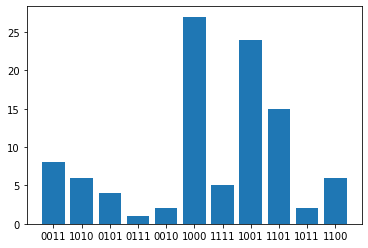

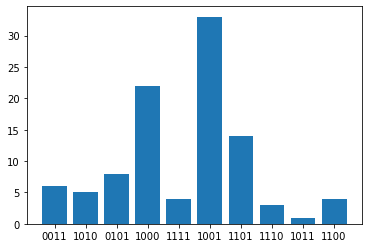

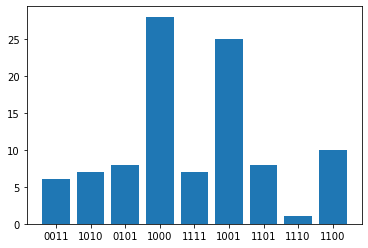

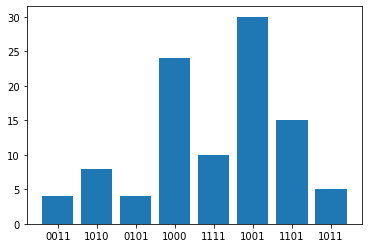

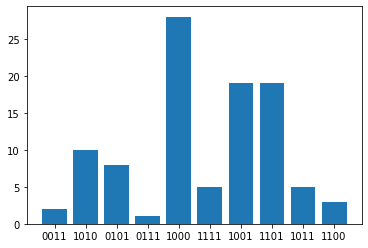

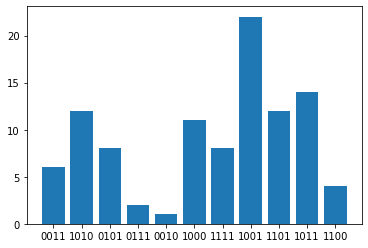

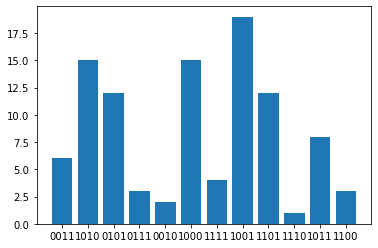

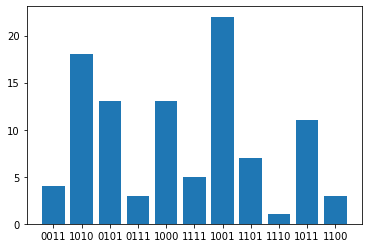

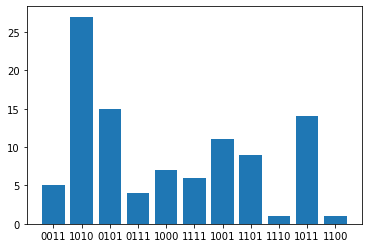

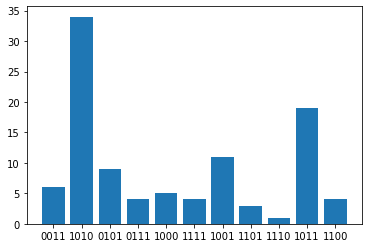

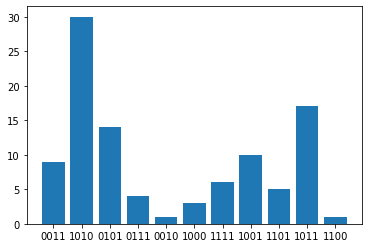

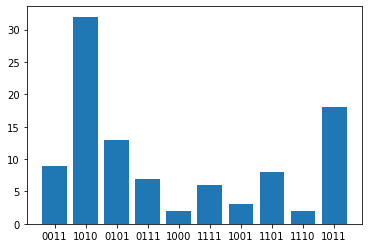

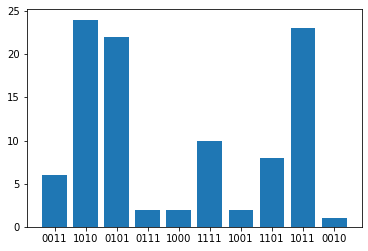

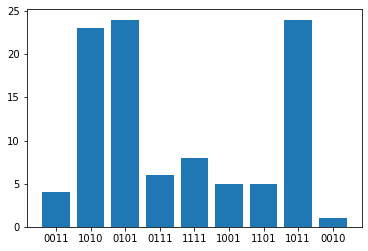

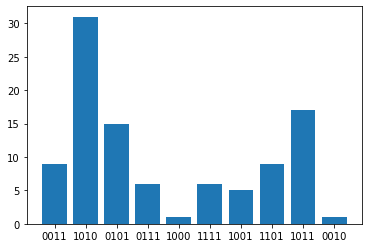

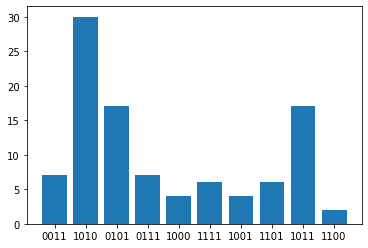

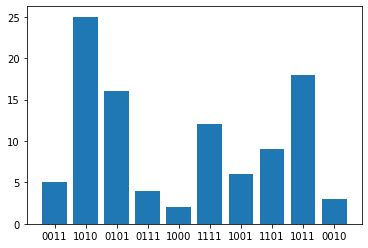

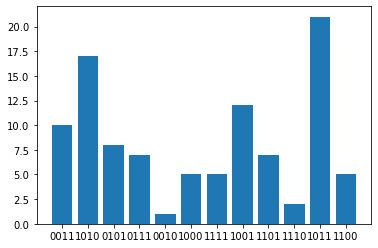

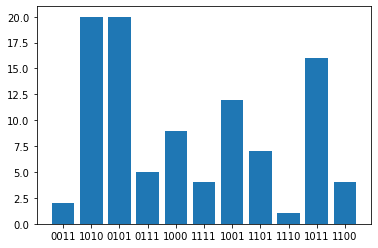

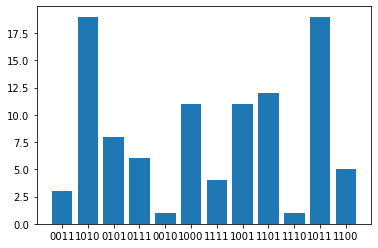

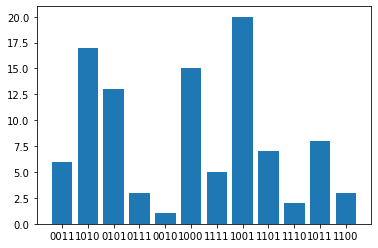

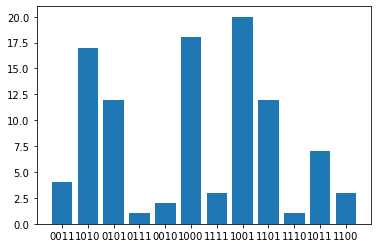

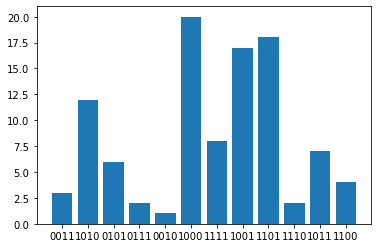

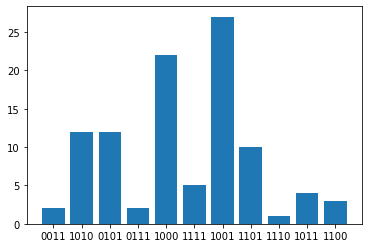

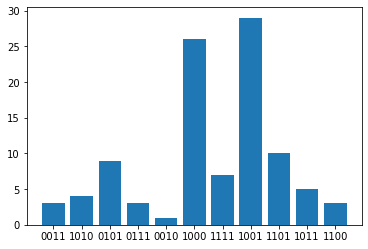

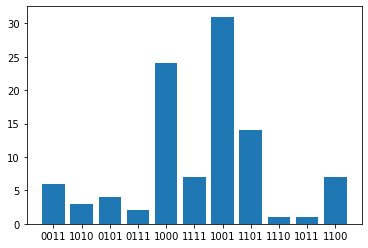

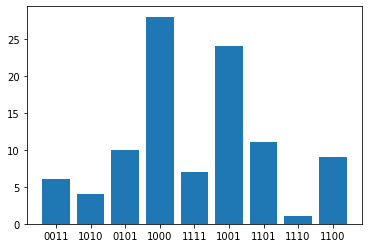

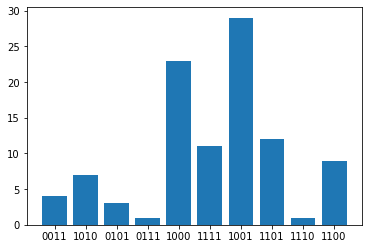

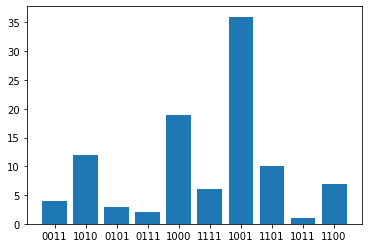

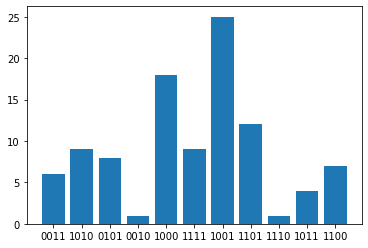

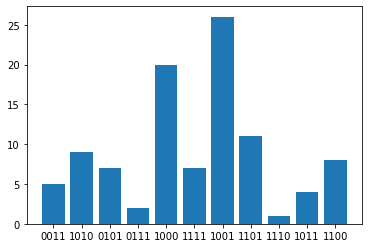

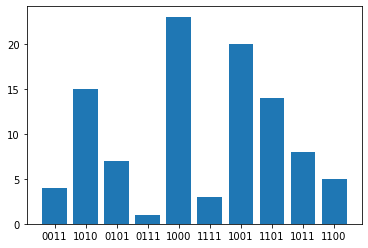

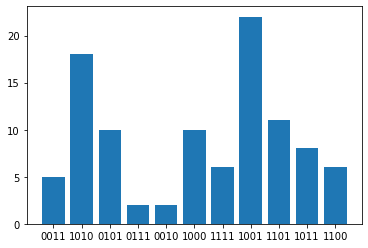

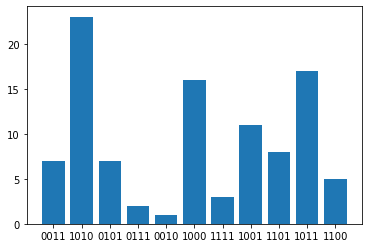

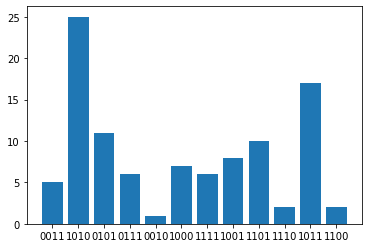

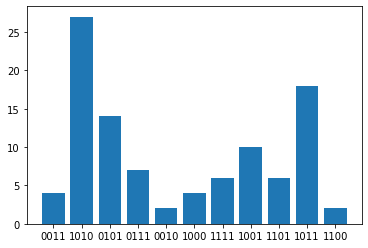

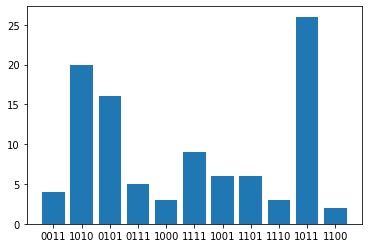

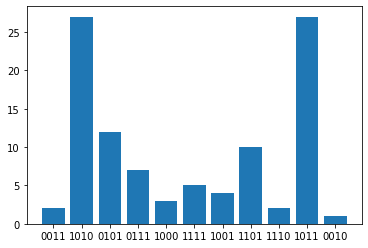

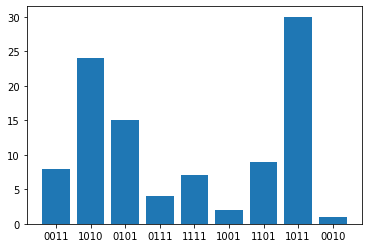

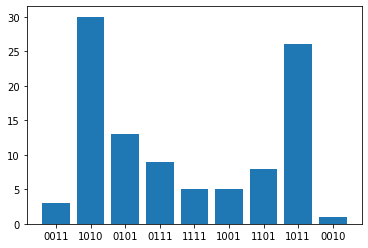

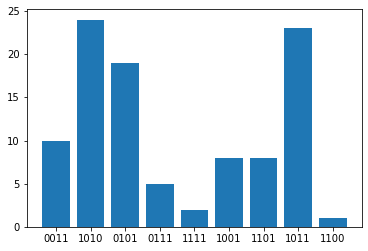

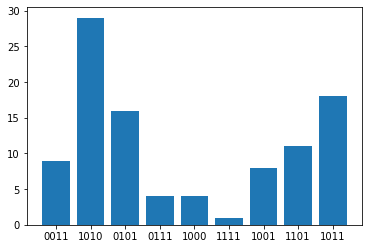

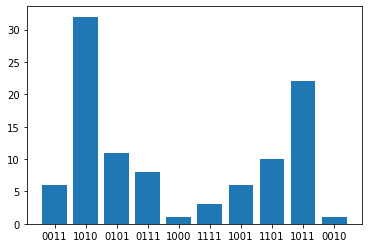

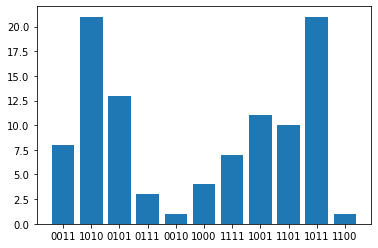

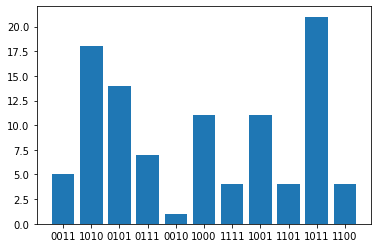

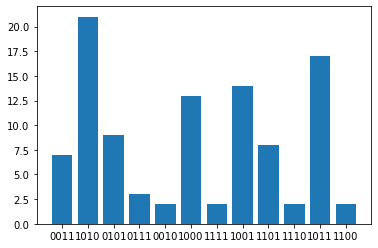

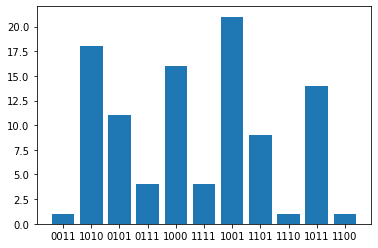

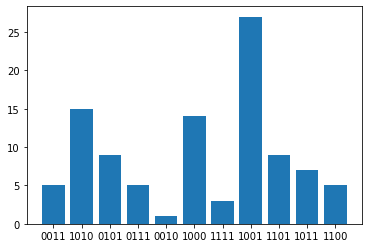

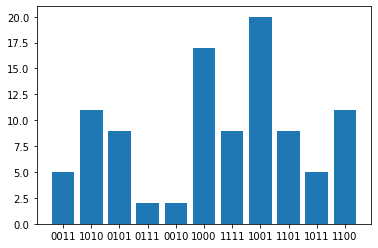

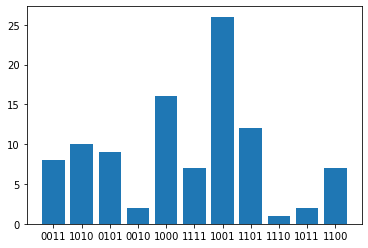

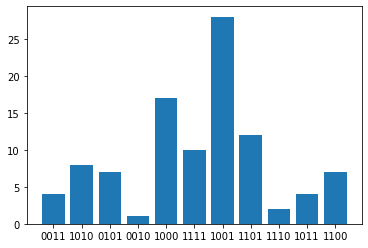

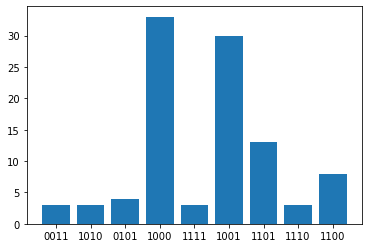

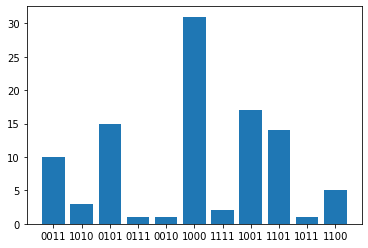

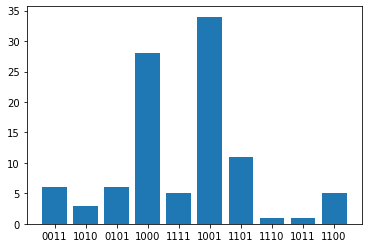

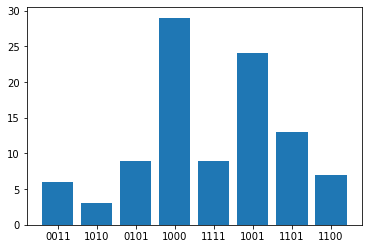

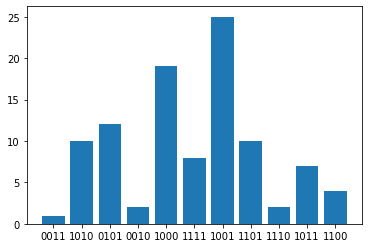

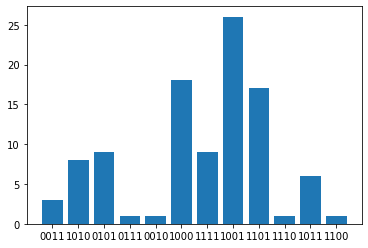

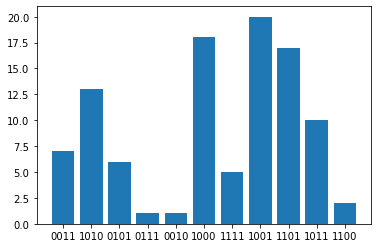

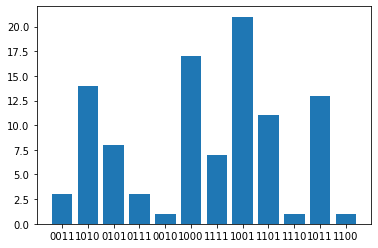

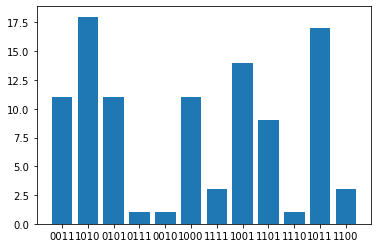

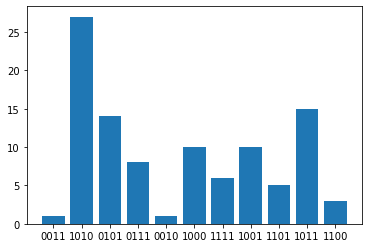

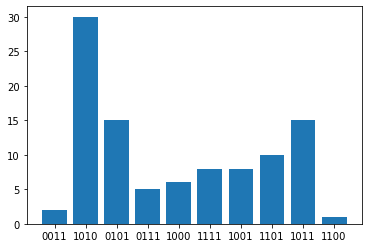

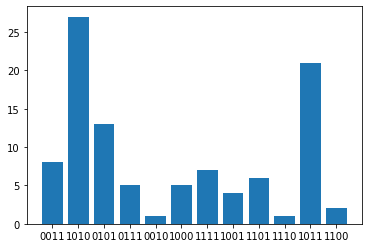

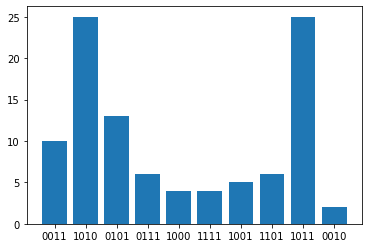

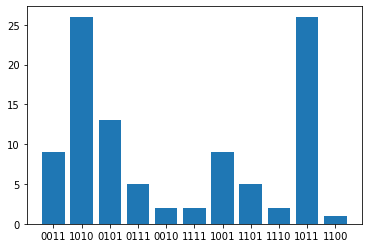

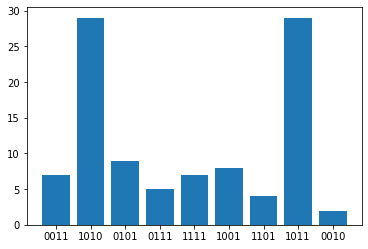

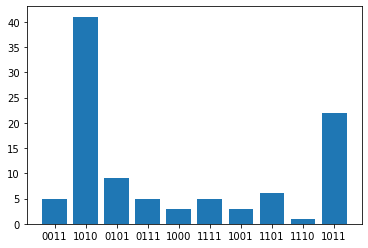

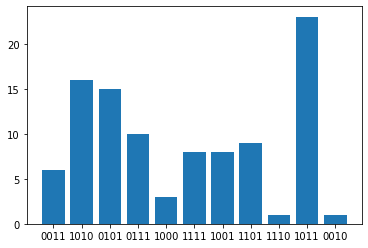

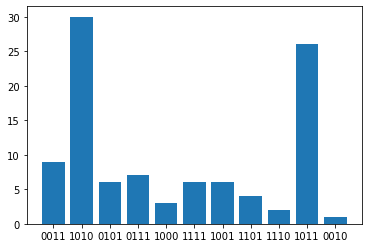

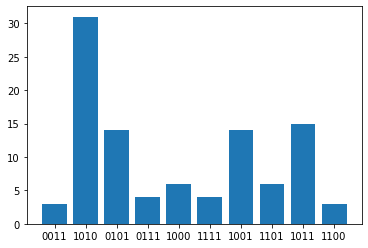

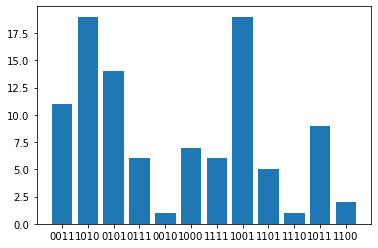

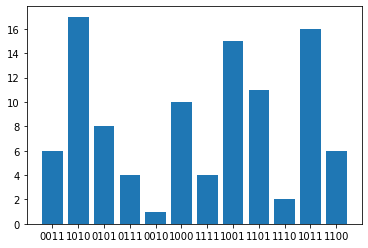

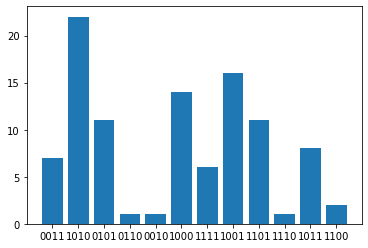

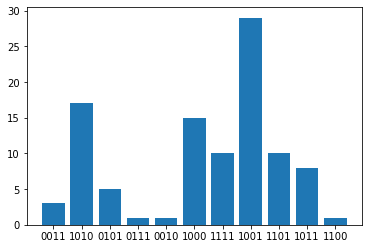

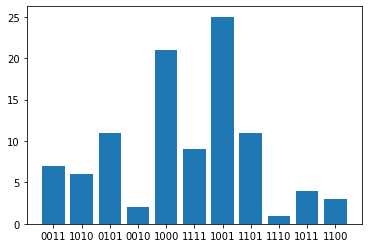

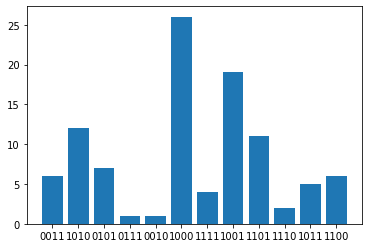

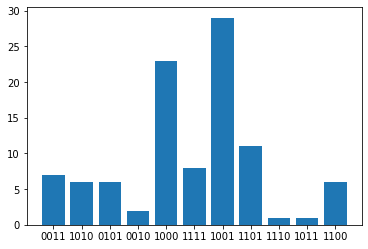

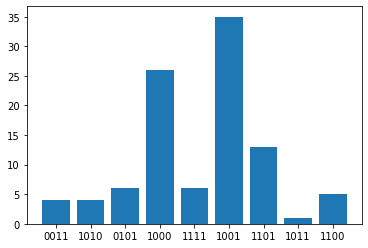

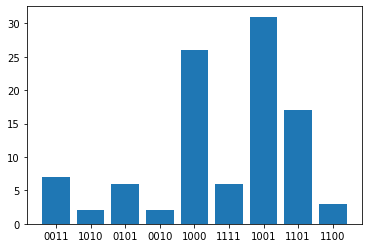

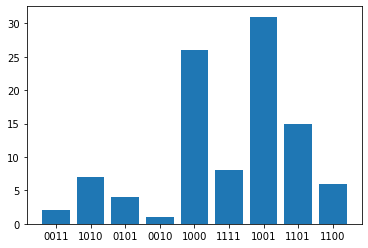

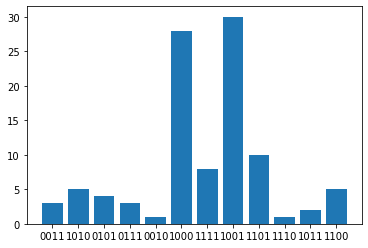

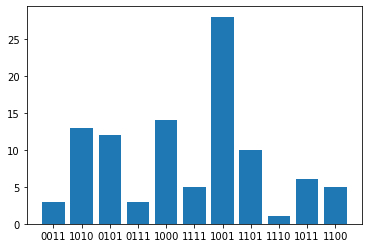

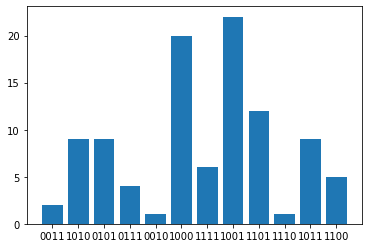

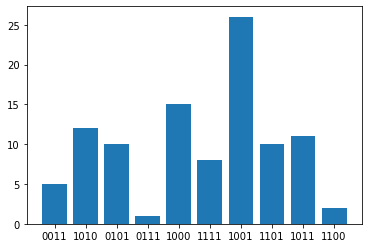

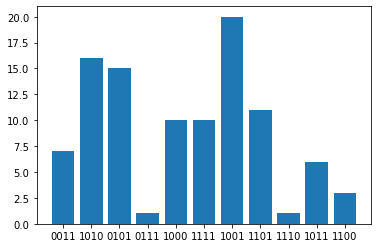

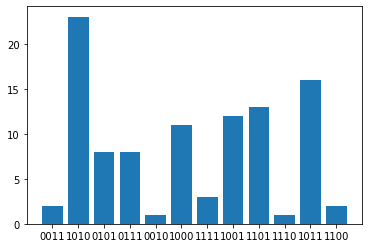

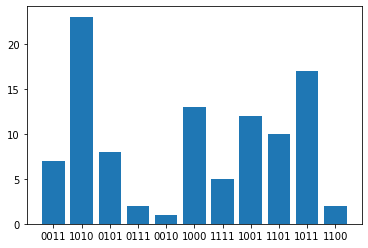

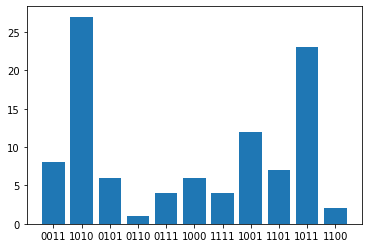

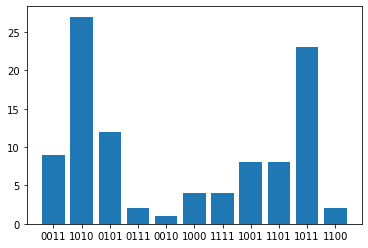

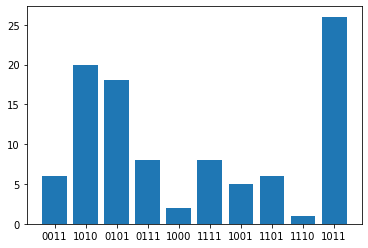

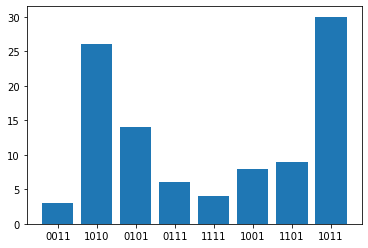

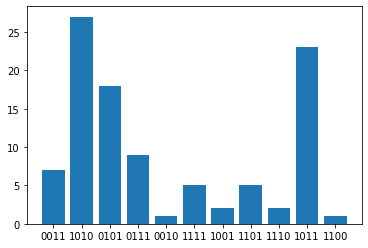

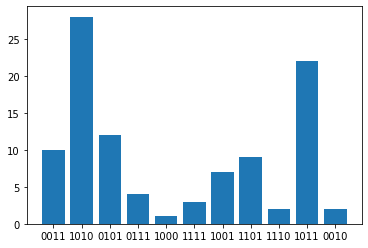

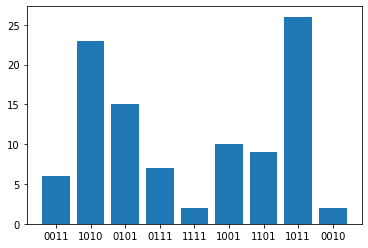

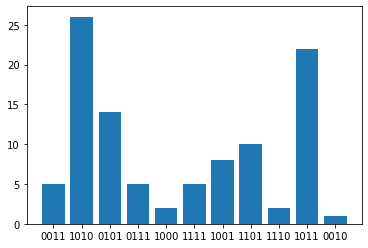

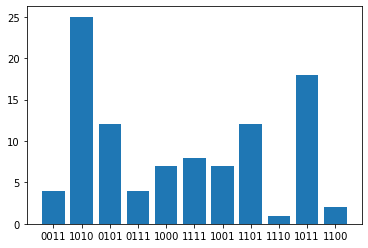

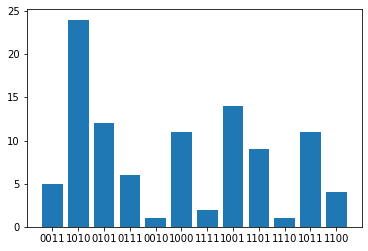

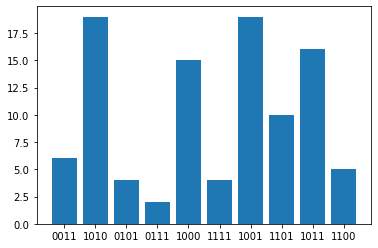

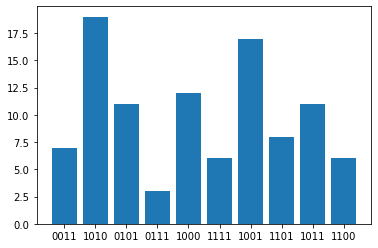

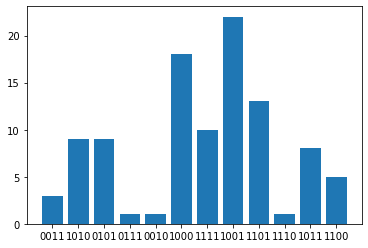

In [36]:
#NEED TO COME WITH A BETTER VIZUALIZATION  
for C in counts:
    plt.bar(range(len(C)), list(C.values()),align='center',)
    plt.xticks(range(len(C)), list(C.keys()))
    plt.show()


In [ ]:
#Trebuie rezolvat bug -ul si aici explicat inca un pic decompozitia hamiltonianului
#Bug isue 
q=QuantumRegister(nq,'q')
c=ClassicalRegister(nq,'c')

qc=QuantumCircuit(q,c)

qc.initialize(psi,q)
qc.unitary(Ut,q)
qc.unitary(UXE,q)
qc.measure(range(nq),range(nq))

qc.draw()#qc.draw(output='mpl') -issue 